In this notebook, we replicate the methodology from [Wilcox et al (2023)](http://www.colinphillips.net/wp-content/uploads/2023/02/wilcox2022.pdf), evaluating a suite of LSTM & Transformer language models on various syntactic constructions.

The first set of experiments the paper reports is on filler-gap dependencies. These are based on Example 5a from the paper, using the 2x2 design described in section 3 (wh/that x +gap/-gap). In this example, `the businessman` is in the gap position.

In [22]:
wh_gap = "I know who without thinking showed the slides to the guests after lunch."
that_gap = "I know that without thinking showed the slides to the guests after lunch."
wh_no_gap = "I know who without thinking the businessman showed the slides to the guests after lunch."
that_no_gap = "I know that without thinking the businessman showed the slides to the guests after lunch"

For now, we compute GPT2 surprisal. It's the easiest to use out of the box, though we may want to use something like [LMZoo](https://github.com/cpllab/lm-zoo) if we can get it to work in Python (I tried this prior to getting GPT2 working), or if our data format can work with its CLI. Wilcox et al compare the surprisal of the token after the gap (the critical region) in grammatical and ungrammatical conditions. For the examples above, it is `showed`. 

In [23]:
from minicons import scorer

In [24]:
model = scorer.IncrementalLMScorer("gpt2")

Using pad_token, but it is not set yet.


In [16]:
def compute_wh_effect(model, wh_sentence, that_sentence, crit_region):
    surprisals = model.token_score([wh_sentence, that_sentence], surprisal = True, base_two = True)
    critical_surprisals = [token_score[1] for sentence in surprisals for token_score in sentence
                           if token_score[0] == crit_region]
    return critical_surprisals[0] - critical_surprisals[1]

In [25]:
compute_wh_effect(model, wh_gap, that_gap, "showed")

-6.653267860412598

In [26]:
compute_wh_effect(model, wh_no_gap, that_no_gap, "showed")

0.5451717376708984

This is in line with the result in Figure 4 of the paper: the wh-effect is negative in the +gap condition and positive in the -gap condition. This means the word after the gap is more surprising in the ungrammatical cases.

## Plotting by-word surprisals

In [19]:
import matplotlib.pyplot as plt

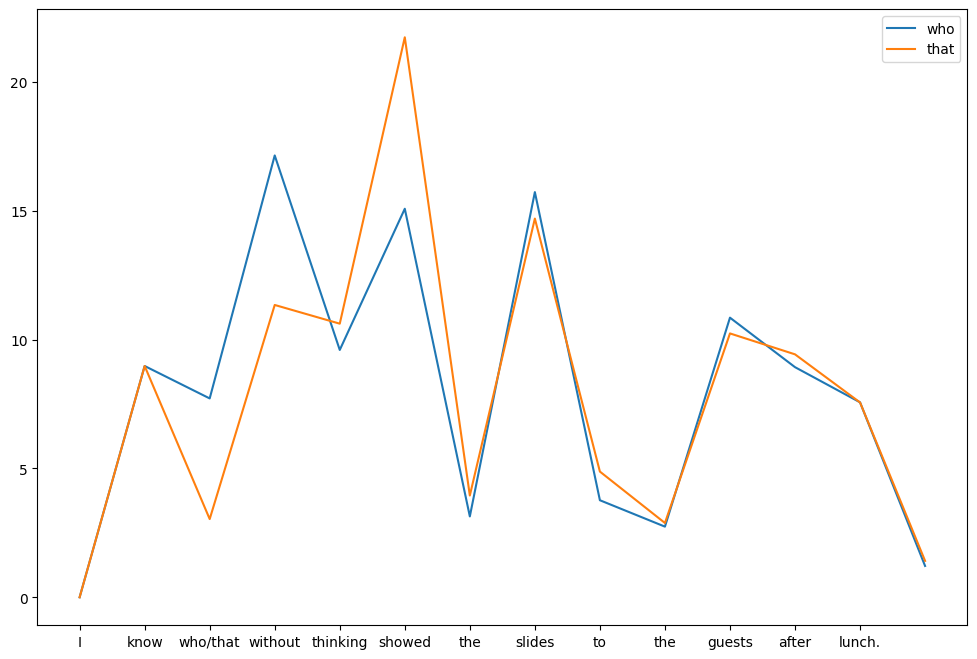

In [70]:
surprisals = model.token_score([wh_gap, that_gap], surprisal = True, base_two = True)
get_index_item = lambda lst, index: [item[index] for item in lst]
wh_surprisal, that_surprisal = [get_index_item(sentence, 1) for sentence in surprisals]
words = wh_gap
words = words.replace("who", "who/that")
x_axis = words.split(" ")
fig, ax = plt.subplots(1,1, figsize = (12, 8))
ax.plot(wh_surprisal, label = "who")
ax.plot(that_surprisal, label = "that")
ax.set_xticks(range(len(x_axis)))
ax.set_xticklabels(x_axis)
ax.legend()
plt.show()

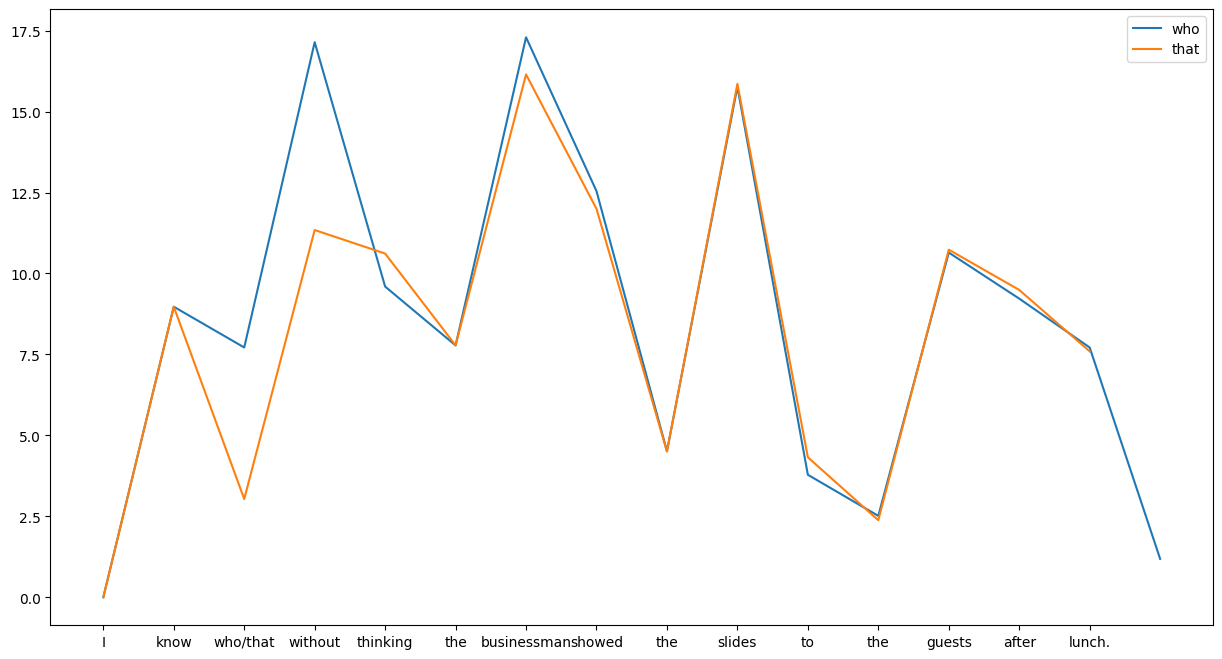

In [73]:
surprisals = model.token_score([wh_no_gap, that_no_gap], surprisal = True, base_two = True)
get_index_item = lambda lst, index: [item[index] for item in lst]
wh_surprisal, that_surprisal = [get_index_item(sentence, 1) for sentence in surprisals]
words = wh_no_gap
words = words.replace("who", "who/that")
x_axis = words.split(" ")
fig, ax = plt.subplots(1,1, figsize = (15, 8))
ax.plot(wh_surprisal, label = "who")
ax.plot(that_surprisal, label = "that")
ax.set_xticks(range(len(x_axis)))
ax.set_xticklabels(x_axis)
ax.legend()
plt.show()